In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np

from netCDF4 import Dataset
# from skimage import transform
from plot_picture_function import set_map_ticks,add_Chinese_provinces
from datetime import timedelta
import cartopy.crs as ccrs

from scipy import stats

In [2]:
dataset= xr.open_dataset('E:/ZiYuanPingGu/result_2022/SCQA829_202201.nc')#读取ERA5 202001整日数据
dataset #修改dims lat lon time

<xarray.Dataset>
Dimensions:   (lon: 161, lat: 221, time: 744)
Dimensions without coordinates: lon, lat, time
Data variables:
    Bias_lwp  (lon, lat, time) float64 ...
    Bias_iwp  (lon, lat, time) float64 ...
    H8_lwp    (lon, lat, time) float64 ...
    H8_iwp    (lon, lat, time) float64 ...

In [3]:
# lwp_ERA5array = np.stack(dataERA5.tclw.data, axis=2)
# iwp_ERA5array = np.stack(dataERA5.tciw.data, axis=2)#转换维度
# lwp_ERA5array.shape

In [4]:
datasetERA5= xr.open_dataset(r'E:\ZiYuanPingGu\ERA5\01.nc')#读取ERA5 202001整日数据
datasetERA5 #修改dims lat lon time
lwp_ERA5array = np.stack(datasetERA5.tclw.data, axis=2)
iwp_ERA5array = np.stack(datasetERA5.tciw.data, axis=2)#转换维度
lwp_ERA5array.shape

(161, 221, 744)

In [6]:
dataset.H8_lwp.data[dataset.H8_lwp.data == -327] = np.nan
dataset.H8_lwp.data[~SAZ_between] = np.nan
dataset.H8_iwp.data[dataset.H8_iwp.data == -327] = np.nan
dataset.H8_iwp.data[~SAZ_between] = np.nan
Bias_lwparray = lwp_ERA5array - dataset.H8_lwp.values
Bias_iwparray = iwp_ERA5array - dataset.H8_iwp.values


In [7]:
Bias_lwparray[np.isnan(Bias_lwparray)] = -327
Bias_iwparray[np.isnan(Bias_iwparray)] = -327
dataset.H8_lwp.data[np.isnan(dataset.H8_lwp.data)] = -327
dataset.H8_iwp.data[np.isnan(dataset.H8_iwp.data)] = -327

In [5]:
# testspace = np.linspace(0, 1, 40, endpoint=False)
# testspace

In [9]:
#以0.025为间隔统计对应期间的H8的lwp和iwp的平均值和标准差
# dataset.Bias_lwp.data
# dataset.H8_lwp
def Getbias_Mean_STD(data, data_bias, looptime):
#     xdict = {} 
#     step = 0.025
#     xspace = np.linspace(0, 1, 41)
#     #建立空xdict
#     for lownum in range(0,len(xspace)-1):
#         xdict[str(xspace[lownum])] = np.empty([0])

#     for itime in range(dataset.dims['time']):
#         onetimedata = dataset.H8_lwp[:,:,itime].data
#         onetimedata_bias = dataset.Bias_lwp[:,:,itime].data
#         for lownum in range(0,len(xspace)-1):#-1为了不取1
#             if ((onetimedata < xspace[lownum]+step) & (onetimedata > xspace[lownum])).any():
#                 xdict[str(xspace[lownum])] = \
#                 np.hstack([xdict[str(xspace[lownum])],\
#                           onetimedata_bias[(onetimedata < \
#                                             xspace[lownum]+step) & (onetimedata > xspace[lownum])]])
    xdict = {} 
    step = 0.025
    xspace = np.linspace(0, 1, 41)
    #建立空xdict
    for lownum in range(0,len(xspace)-1):
        xdict[str(xspace[lownum])] = np.empty([0])

    for itime in range(looptime):
        onetimedata = data[:,:,itime].data
        onetimedata_bias = data_bias[:,:,itime]
        for lownum in range(0,len(xspace)-1):#-1为了不取1
            if ((onetimedata < xspace[lownum]+step) & (onetimedata > xspace[lownum])).any():
                xdict[str(xspace[lownum])] = \
                np.hstack([xdict[str(xspace[lownum])],\
                          onetimedata_bias[(onetimedata < \
                                            xspace[lownum]+step) & (onetimedata > xspace[lownum])]])
    return xdict
xdict_lwp = Getbias_Mean_STD(dataset.H8_lwp, Bias_lwparray, dataset.dims['time'])
xdict_iwp = Getbias_Mean_STD(dataset.H8_iwp, Bias_iwparray, dataset.dims['time'])

In [7]:
#查看将lwp和iwp的偏差，H8的lwp,iwp展开为一向量
vector_bias_lwp = Bias_lwparray.flatten()
vector_bias_iwp = Bias_iwparray.flatten()
vector_H8_lwp = dataset.H8_lwp.data.flatten()
vector_H8_iwp = dataset.H8_iwp.data.flatten()
lwpindex = vector_H8_lwp != -327
iwpindex = vector_H8_iwp != -327

In [10]:
def Get_statistic_dict(datadict):
    statistic_dict = {}
    for keyname in datadict.keys():
        Mean = round(
            np.mean(datadict[keyname]), 4
        )
        Std = round(
            np.std(datadict[keyname]), 4
        )
        statistic_dict[keyname] = (Mean, Std)
    return statistic_dict

statistic_dict_lwp = Get_statistic_dict(xdict_lwp)
statistic_dict_iwp = Get_statistic_dict(xdict_iwp)

In [8]:
valid_Biaslwpdata = np.empty([0])
valid_Biasiwpdata = np.empty([0])
for itime in range(dataset.dims['time']):
    onetimedata_lwp = Bias_lwparray[:,:,itime]
    onetimedata_iwp = Bias_iwparray[:,:,itime]
    valid_Biaslwpdata = \
    np.hstack([valid_Biaslwpdata,onetimedata_lwp[onetimedata_lwp != -327]])
    valid_Biasiwpdata = \
    np.hstack([valid_Biasiwpdata,onetimedata_iwp[onetimedata_iwp != -327]])

STD_lwp = np.std(valid_Biaslwpdata)
STD_iwp = np.std(valid_Biasiwpdata)
MEAN_lwp = np.mean(valid_Biaslwpdata)
MEAN_iwp = np.mean(valid_Biasiwpdata)
# RMSE = np.sqrt(valid_Biasdata**2)

In [9]:
RMSE_lwp = np.sqrt(sum(valid_Biaslwpdata**2)/len(valid_Biaslwpdata))
RMSE_iwp = np.sqrt(sum(valid_Biasiwpdata**2)/len(valid_Biasiwpdata))

In [10]:
print(RMSE_lwp, RMSE_iwp)

0.45334522850899595 1.303152693541407


In [11]:
print(STD_lwp, STD_iwp)

0.44689397646620665 1.1508490862570293


In [12]:
print(MEAN_lwp, MEAN_iwp)

-0.07620807050455351 -0.6113536810602902


In [22]:
#统计下Bias的概率分布情况
# plt.close()
# validlwp = dataset.ERA5_lwp != -327
# validiwp = dataset.ERA5_iwp != -327
# fig = plt.figure(figsize=(12,6), dpi=1000)
# ax1 = fig.add_subplot(121)
# ax1.hist(dataset.Bias_lwp.data[validlwp])
# ax1.set(xlim=(-2, 8))
# ax1.set_yscale('log')
# ax1.set_title('lwp')
# ax2 = fig.add_subplot(122)
# ax2.hist(dataset.Bias_iwp.data[validiwp])
# ax2.set(xlim=(-2, 8))
# ax2.set_yscale('log')
# ax2.set_title('iwp')
# plt.show()

In [13]:
#计算云水、云冰在空间上的分布情况，月平均值
def Get_stack(dataset, looptime):
    data_stack = np.zeros([161, 221, looptime])
    Countvalid_stack = np.zeros([161, 221])
    for itime in range(looptime):
        onetimedata = dataset[:,:,itime]
        Countvalid_stack[onetimedata != -327] += 1
        data_stack[:,:,itime][onetimedata != -327] = onetimedata[onetimedata != -327]
    return data_stack.sum(axis=2), Countvalid_stack

# stack_lwparray, Countvalid_stack_lwp= Get_stack(dataset.Bias_lwp.data, dataset.dims['time'])
# stack_iwparray, Countvalid_stack_iwp= Get_stack(dataset.Bias_iwp.data, dataset.dims['time'])

def Get_origin_stack(dataset1, dataset2, looptime):
    data_stack1 = np.zeros([161, 221, looptime])
    data_stack2 = np.zeros([161, 221, looptime])
    Countvalid_stack = np.zeros([161, 221])
    for itime in range(looptime):
        onetimedata1 = dataset1[:,:,itime]
        onetimedata2 = dataset2[:,:,itime]
        Countvalid_stack[onetimedata1 != -327] += 1
        data_stack1[:,:,itime][onetimedata1 != -327] = onetimedata1[onetimedata1 != -327]
        data_stack2[:,:,itime][onetimedata1 != -327] = onetimedata2[onetimedata1 != -327]
        
    Mean_sum1 = data_stack1.sum(axis=2)/Countvalid_stack
    Mean_sum2 = data_stack2.sum(axis=2)/Countvalid_stack
    return Mean_sum1, Mean_sum2, Countvalid_stack
H8array_lwp, ERA5array_lwp, Countvalid_stack_lwp = \
    Get_origin_stack(dataset.H8_lwp.data, dataset.ERA5_lwp.data, dataset.dims['time'])

H8array_iwp, ERA5array_iwp, Countvalid_stack_iwp = \
    Get_origin_stack(dataset.H8_iwp.data, dataset.ERA5_iwp.data, dataset.dims['time'])
# H8_lwparray, Countvalid_H8_lwp= Get_stack(dataset.H8_lwp.data, dataset.dims['time'])
# H8_iwparray, Countvalid_H8_iwp= Get_stack(dataset.H8_iwp.data, dataset.dims['time'])
# ERA5_lwparray, Countvalid_ERA5_lwp= Get_stack(lwp_ERA5array, dataset.dims['time'])
# ERA5_iwparray, Countvalid_ERA5_iwp= Get_stack(iwp_ERA5array, dataset.dims['time'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9540\2439099675.py:25: RuntimeWarning: invalid value encountered in true_divide
  Mean_sum1 = data_stack1.sum(axis=2)/Countvalid_stack
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9540\2439099675.py:26: RuntimeWarning: invalid value encountered in true_divide
  Mean_sum2 = data_stack2.sum(axis=2)/Countvalid_stack


In [ ]:
# array_lwp = np.empty([161, 221])*np.nan
# array_iwp = np.empty([161, 221])*np.nan

# H8array_lwp = np.empty([161, 221])*np.nan
# H8array_iwp = np.empty([161, 221])*np.nan
# ERA5array_lwp = np.empty([161, 221])*np.nan
# ERA5array_iwp = np.empty([161, 221])*np.nan

# array_lwp[Countvalid_stack_lwp != -327] \
# = stack_lwparray[Countvalid_stack_lwp  != -327]/Countvalid_stack_lwp[Countvalid_stack_lwp != -327]
#当Countvalid_stack_lwp中出现0时，不能作为除数，因此会有nan
# array_iwp[Countvalid_stack_iwp != -327] \
# = stack_iwparray[Countvalid_stack_iwp  != -327]/Countvalid_stack_iwp[Countvalid_stack_iwp != -327]

# H8array_lwp[Countvalid_H8_lwp != -327] \
# = H8_lwparray[Countvalid_H8_lwp != -327]/Countvalid_H8_lwp[Countvalid_H8_lwp != -327]

# H8array_iwp[Countvalid_H8_iwp != -327] \
# = H8_iwparray[Countvalid_H8_iwp != -327]/Countvalid_H8_iwp[Countvalid_H8_iwp != -327]

# ERA5array_lwp[Countvalid_ERA5_lwp != -327] \
# = ERA5_lwparray[Countvalid_ERA5_lwp != -327]/Countvalid_ERA5_lwp[Countvalid_ERA5_lwp != -327]

# ERA5array_iwp[Countvalid_ERA5_iwp != -327] \
# = ERA5_iwparray[Countvalid_ERA5_iwp != -327]/Countvalid_ERA5_iwp[Countvalid_ERA5_iwp != -327]

In [23]:
x = np.linspace(80.0, 135.0, 221)
y = np.linspace(15.0, 55.0, 161)
X, Y = np.meshgrid(x, y)

In [15]:
array_Biaslwp = ERA5array_lwp - H8array_lwp
array_Biasiwp = ERA5array_iwp - H8array_iwp

In [22]:
def Plot_2_pic(data1, data2, picname, title1, title2, colorp):
    extent = [80, 135, 15, 55]#100E--110E,25N--35N
    proj = ccrs.PlateCarree()#选择投影方式，平面投影
    fig = plt.figure(figsize=(9,6), dpi=1000)
    ax1 = fig.add_subplot(211, projection=proj)#创建一个轴，或者是说主体
    # 设置经纬度刻度.
    set_map_ticks(ax1, dx=10, dy=10, nx=1, ny=1, labelsize='small')#自定义函数set_map_tick
    ax1.set_extent(extent, crs=proj)
    ax1.set_title(title1, fontsize=8, loc='left')
#     ax1.set_title('Mean_Bias={}'.format(round(MEAN_lwp, 3)), fontsize=8, loc='right')
    # im = plt.pcolormesh(lon_mesh, lat_mesh, dem_data,cmap = "rainbow")
#     levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    levels = np.linspace(0, 0.6, 11)
#     levels = np.linspace(-0.5, 0.5, 11)
    im1 = ax1.contourf(X, Y, data1, cmap = colorp, levels=levels, extend='both')
    add_Chinese_provinces(ax1, lw=0.5, ec='gray', fc='none')#后两个参数是设置eagecolor,facecolor,linewigth线宽
    #设置colorbar的位置
    cax1 = fig.add_axes([ax1.get_position().x1 + 0.03, ax1.get_position().y0, 0.02, ax1.get_position().height])
    plt.colorbar(im1, cax=cax1)

    ax2 = fig.add_subplot(212, projection=proj)#创建一个轴，或者是说主体
    # 设置经纬度刻度.
    set_map_ticks(ax2, dx=10, dy=10, nx=1, ny=1, labelsize='small')#自定义函数set_map_tick
    ax2.set_extent(extent, crs=proj)
    ax2.set_title(title2, fontsize=8, loc='left')
#     ax2.set_title('Mean_Bias={}'.format(round(MEAN_iwp, 3)), fontsize=8, loc='right')
    # im = plt.pcolormesh(lon_mesh, lat_mesh, dem_data,cmap = "rainbow")
#     levels = np.linspace(-1.5, 1.5, 11)
    levels = np.linspace(0, 0.6, 11)
    im2 = ax2.contourf(X, Y, data2, cmap = colorp, levels=levels, extend='both')
    add_Chinese_provinces(ax2, lw=0.5, ec='gray', fc='none')#后两个参数是设置eagecolor,facecolor,linewigth线宽
    #设置colorbar的位置
    cax2 = fig.add_axes([ax2.get_position().x1 + 0.03, ax2.get_position().y0, 0.02, ax2.get_position().height])
    plt.colorbar(im2, cax=cax2)
#     plt.savefig(f'D:/python project/python_qixianglianxi/ZiYuanPingGu/20220619/{picname}.png',
#                 dpi=100,
#                 bbox_inches = 'tight'
#     #             facecolor = 'g',
#     #             edgecolor = 'b'
#                )
#     plt.show()
# levels = [-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]    
# Plot_2_pic(array_Biaslwp, array_Biasiwp, 'bias_lwp_01', 'lwp_bias', 'iwp_bias', 'coolwarm')

In [ ]:
Plot_2_pic(array_Biaslwp, array_Biasiwp, 'bias_lwp_01', 'lwp_bias', 'iwp_bias', 'coolwarm')

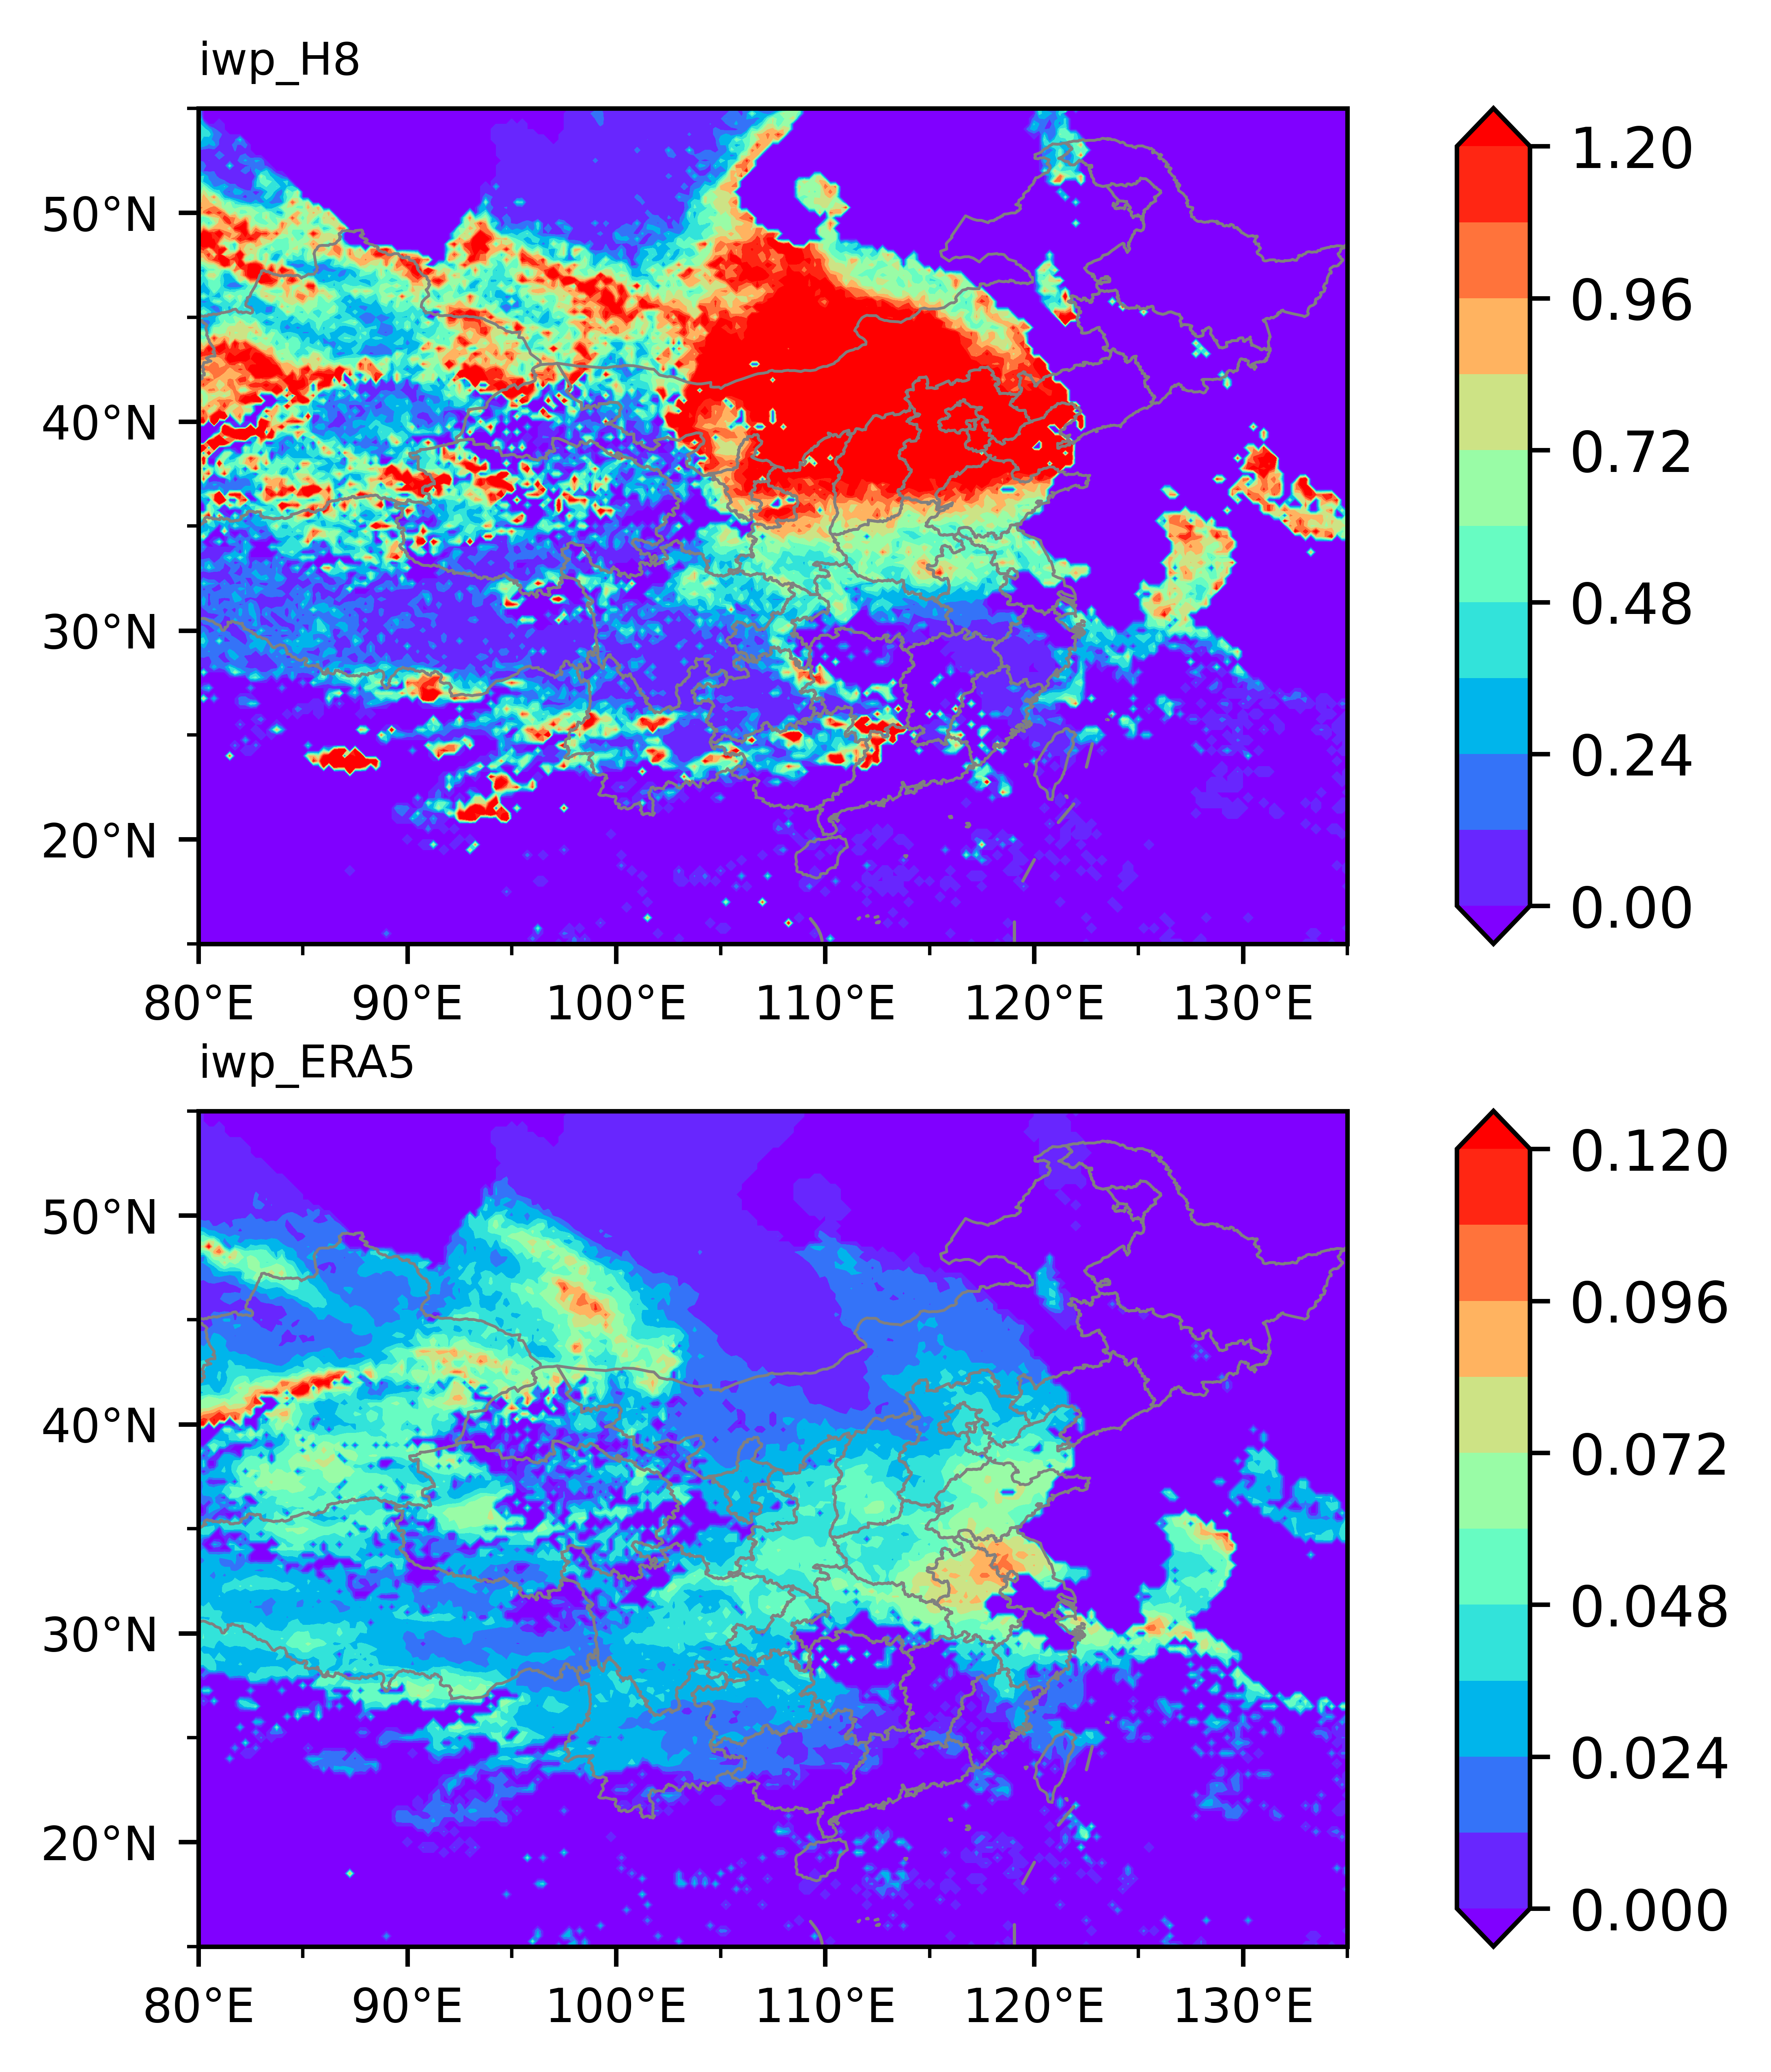

In [34]:
Plot_2_pic(H8array_iwp, ERA5array_iwp, 'origin_iwp_01', 'iwp_H8', 'iwp_ERA5', 'rainbow')

In [28]:
# lwp_biasarray = dataset.Bias_lwp.data
# lwp_biasarray[0].shape

In [29]:
# lwp_H8array = dataset.H8_lwp.data
# iwp_H8array = dataset.H8_iwp.data

In [30]:
ERA5array_lwp

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.12998447, 0.05693019, ..., 0.0720551 , 0.06642527,
        0.06556314],
       [0.        , 0.08774963, 0.06434949, ..., 0.0752651 , 0.06448376,
        0.05777361],
       [0.        , 0.09510342, 0.08207531, ..., 0.06412325, 0.05781908,
        0.06105925]])

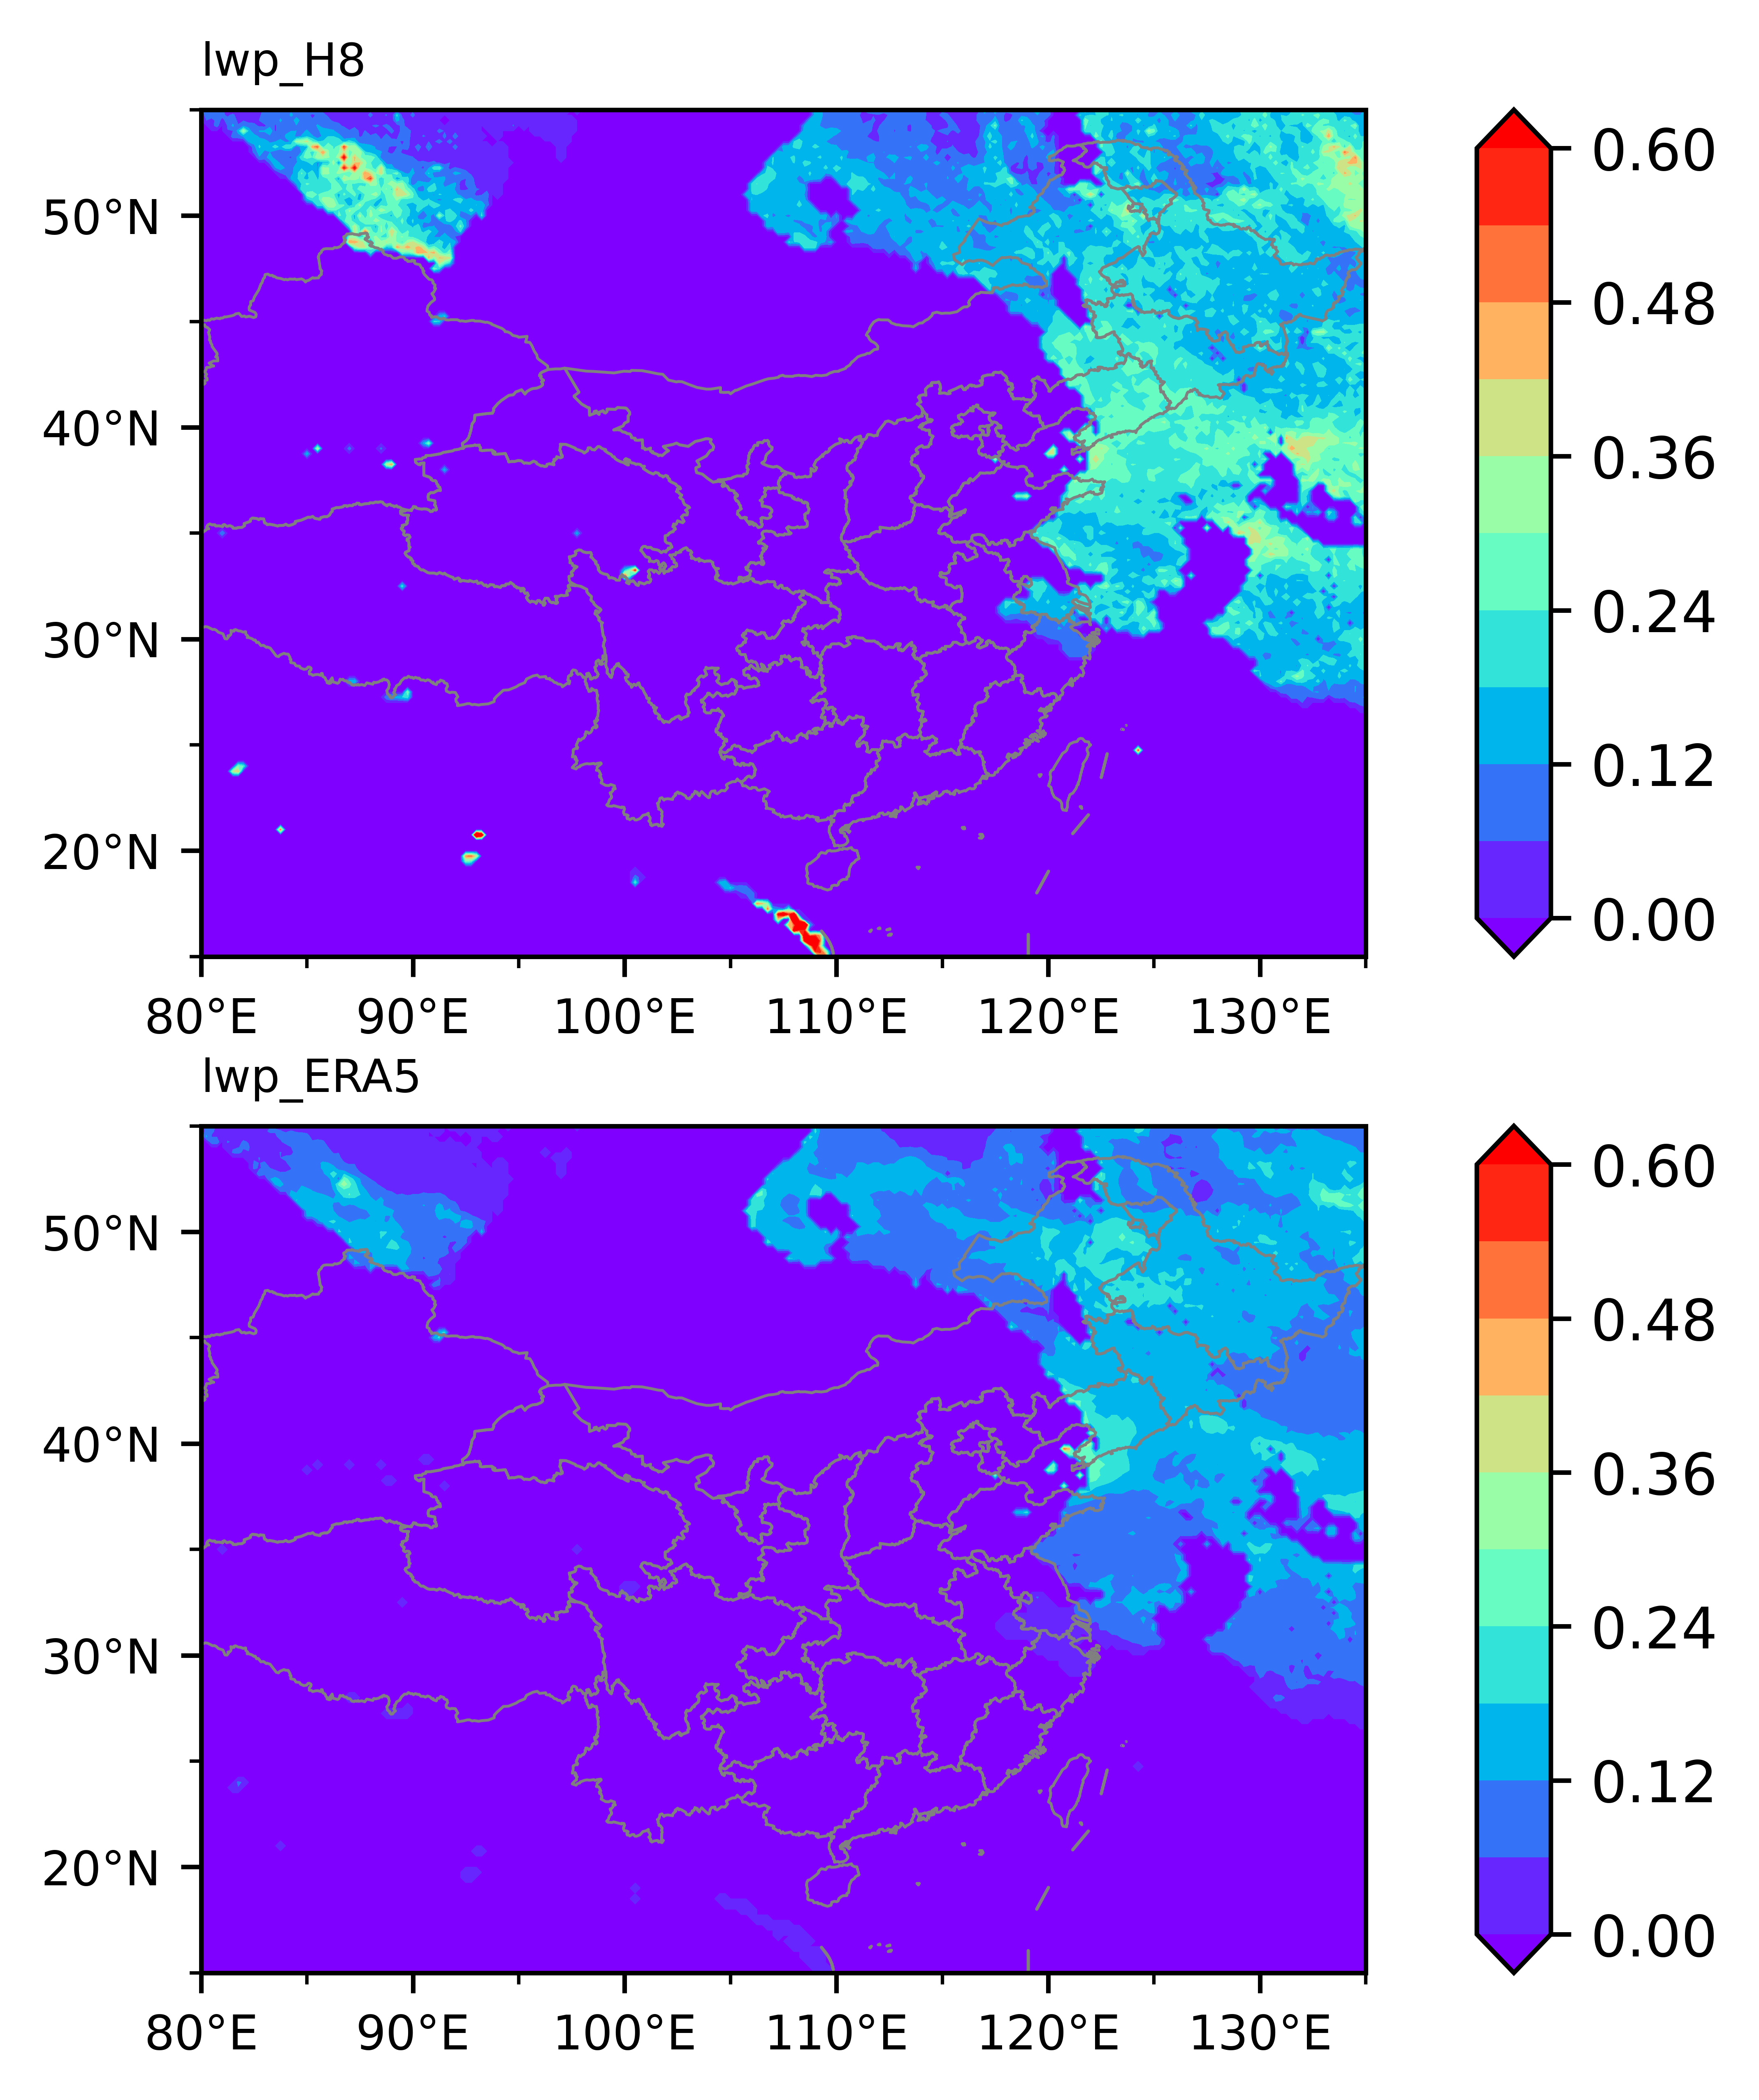

In [36]:
# levels = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
# levels = np.linspace(0, 50, 20)
plt.close()
Plot_2_pic(H8array_lwp, ERA5array_lwp, 'origin_lwp_04', 'lwp_H8', 'lwp_ERA5', 'rainbow')

In [32]:
# levels = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
# plt.close()
# Plot_2_pic(H8array_iwp, ERA5array_iwp, 'origin_iwp_10', 'iwp_H8', 'iwp_ERA5', 'rainbow')

In [ ]:
# covmatrix = np.cov(lwp_ERA5array[boolmatrix].flatten(), lwp_H8array[boolmatrix].flatten())

In [ ]:
# cha1 = lwp_ERA5array[boolmatrix].flatten() - np.mean(lwp_ERA5array[boolmatrix].flatten())
# cha2 = lwp_H8array[boolmatrix].flatten() - np.mean(lwp_H8array[boolmatrix].flatten())
# ji = cha1*cha2
# np.sum(ji)/(len(ji)-1)

In [ ]:
# covmatrix[0,1]

In [ ]:
# vardot = np.sqrt(np.var(lwp_ERA5array[boolmatrix].flatten())*np.var(lwp_H8array[boolmatrix].flatten()))

In [ ]:
# R = covmatrix[0,1]/vardot

In [ ]:
# R #0.29696616205448845